# Naive Bayes Classification 



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 讀進資料，並進行一些資料觀察分析

#### 讀檔

In [ ]:
df = pd.read_csv('wine.csv')
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


#### 每一個欄位個別的統計值觀察

In [ ]:
df.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### 使用盒鬚圖顯示每一欄的資料

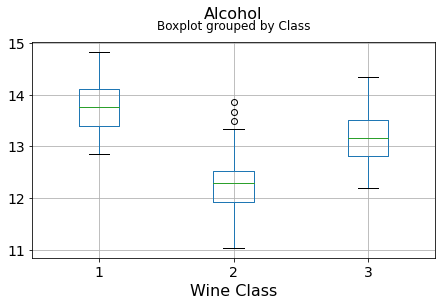

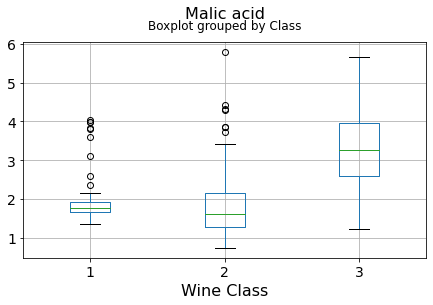

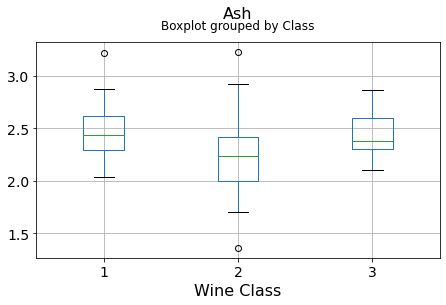

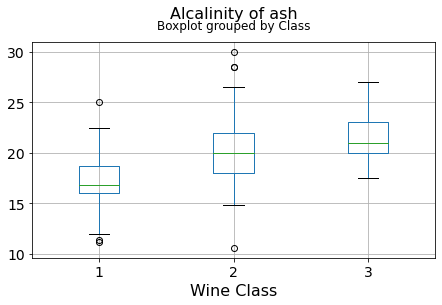

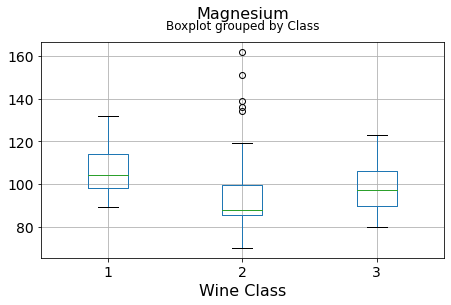

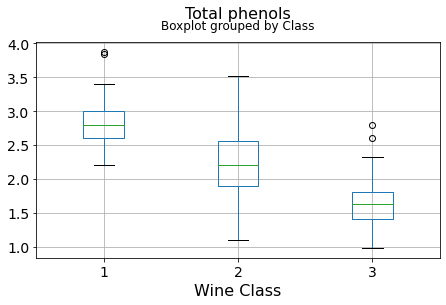

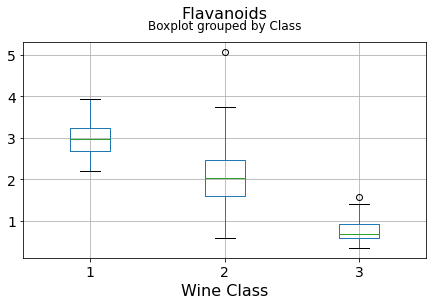

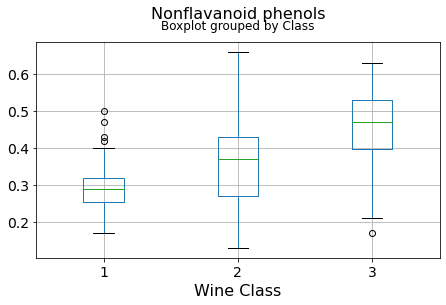

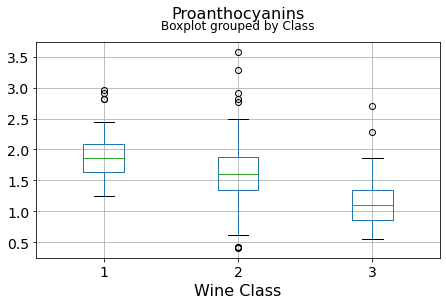

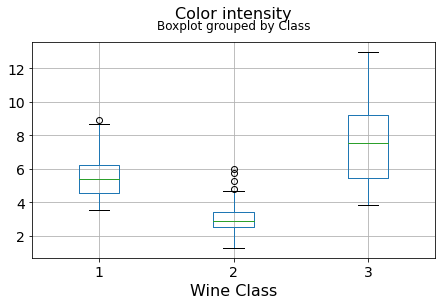

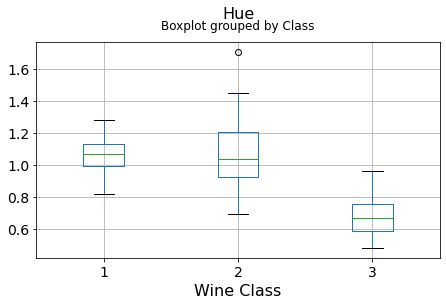

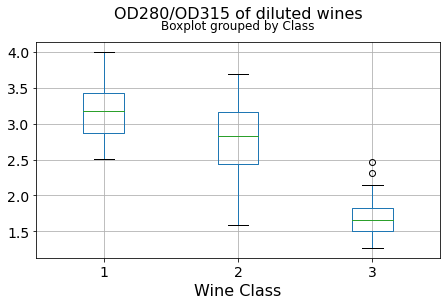

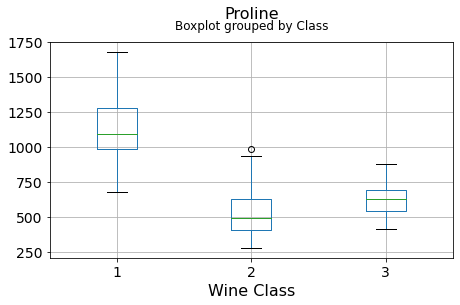

In [ ]:
for c in df.columns[1:]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)

**使用點狀圖** 看一下兩個特徵在二維之間的分布

Text(0, 0.5, 'Flavanoids')

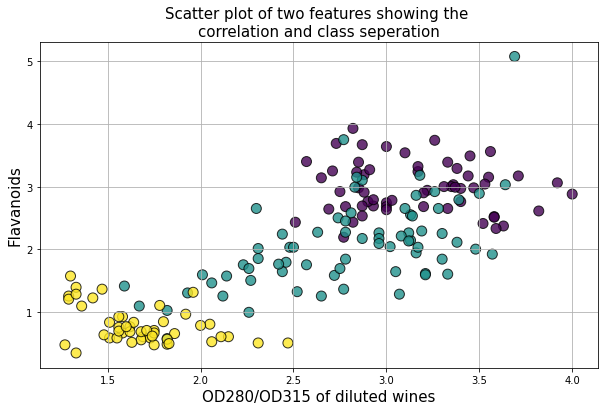

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD280/OD315 of diluted wines'],df['Flavanoids'],c=df['Class'],edgecolors='k',alpha=0.8,s=100)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280/OD315 of diluted wines",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)

## Plot co-variance matrix ##



<ipython-input-10-ff6b588b834f>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels,fontsize=9)
<ipython-input-10-ff6b588b834f>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels,fontsize=9)


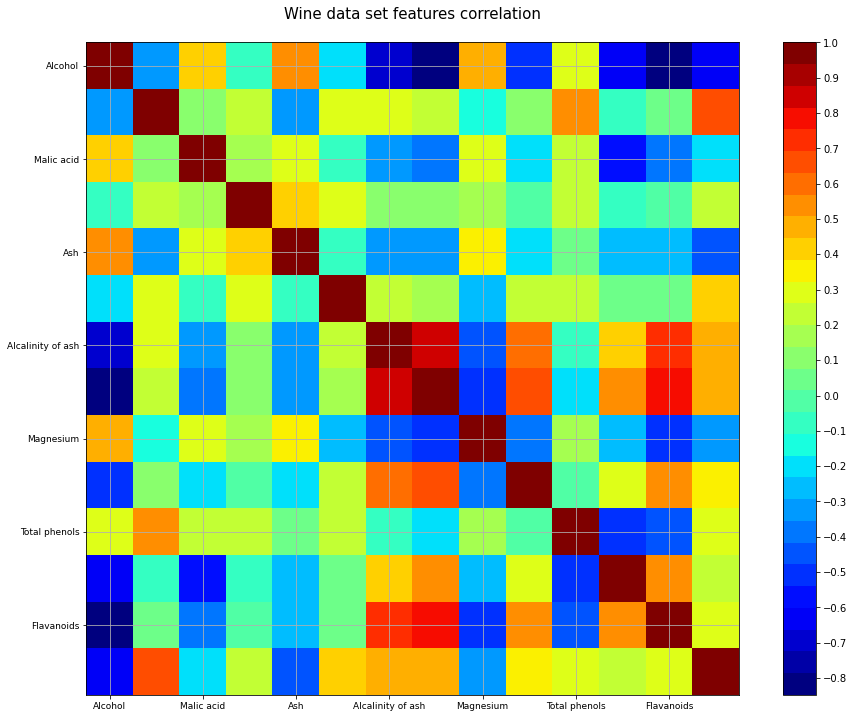

In [ ]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

## Naive Bayes Classification

#### Test/train split

In [ ]:
from sklearn.model_selection import train_test_split

test_size=0.3 # Test-set fraction

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [ ]:
X_train.shape

(124, 13)

In [ ]:
X_test.shape

(54, 13)

In [ ]:
X_train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.4,0.57,1.33,550
57,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.0,1.07,2.84,1270
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.0,0.60,1.68,830
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.6,1.24,3.37,1265
26,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.8,0.92,3.22,1195


#### Classification using **GaussianNB**

Given a class variable $y$ and a dependent feature vector $x_1$ through $x_n$, Bayes’ theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$
Using the naive independence assumption that
$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
for all $i$, this relationship is simplified to
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)} {P(x_1, \dots, x_n)}$$

Since $P(x_1, \dots, x_n)$ is constant given the input, we can use the following classification rule:
$$P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)$$
$$\Downarrow$$ 
$$\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),$$

and we can use [**Maximum A Posteriori**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$; the former is then the relative frequency of class $y$ in the training set.

***GaussianNB ()*** implements the Gaussian Naive Bayes algorithm for classification. **The likelihood of the features is assumed to be Gaussian**:

$$ P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}) $$

The parameters $\sigma_y$ and $\mu_y$ are estimated using maximum likelihood.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nbc = GaussianNB()

訓練

In [ ]:
nbc.fit(X_train,y_train)

GaussianNB()

#### 預測 找出多少個分錯

In [ ]:
y_pred = nbc.predict(X_test)
mislabel = np.sum((y_test!=y_pred))
print("Total number of mislabelled data points from {} test samples is {}".format(len(y_test),mislabel))

Total number of mislabelled data points from 54 test samples is 3


### 做分類報告

In [ ]:
from sklearn.metrics import classification_report

### **Precision** 抓出來的有多少true
### **recall** true被抓出來多少

### **一位警察很厲害，抓了很多犯人，但是這些犯人當中，只有少部分真正有罪，其他都是被冤枉的。**

#### recall高，因為該抓與不該抓的犯人都被抓到了
#### precision低，因為很多都是沒犯罪的人
「寧可錯抓一百，也不可放過一個」→   recall 高，但 precision 低

### **一個警察非常嚴謹，只逮捕真正有犯罪的人，不抓實在是沒辦法肯定的犯人。**

#### precision高，因為通常被抓到人的都是有罪的，
#### recall低，因為不小心放掉一大群犯人
「寧可錯放一百，也不可冤枉一個」
→   precision 高，但 recall 低

### **F-score** 把Precision和Recall放在一起考慮 越接近1 表示結果越好
$$ 利用\beta調整權重，來決定Precision和Recall那一個更重要$$

$$ F_\beta = (1+\beta^2)*\frac{Precision*Recall}{(\beta*Precision)+Recall} $$ 

$$ \beta 是權重 等於1 代表Precision和Recall一樣重要 變成F1-score$$ 

$$ F1 = 2*\frac{Precision*Recall}{Precision+Recall} $$

### **Support**  該類別有幾個

In [ ]:
print("The classification report is as follows...\n")
print(classification_report(y_pred,y_test))

The classification report is as follows...

              precision    recall  f1-score   support

           1       0.82      1.00      0.90        14
           2       1.00      0.88      0.94        25
           3       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.94      0.96      0.95        54
weighted avg       0.95      0.94      0.95        54



### 做混淆矩陣

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = (confusion_matrix(y_test,y_pred))
cmdf = pd.DataFrame(cm,index=['Class 1','Class 2',' Class 3'], columns=['Class 1','Class 2',' Class 3'])
print("The confusion matrix looks like following...\n")
cmdf

The confusion matrix looks like following...



,Class 1,Class 2,Class 3
Class 1,14,3,0
Class 2,0,22,0
Class 3,0,0,15



** This showed that even in the presence of corrletation among features, the Naive Bayes algorithm performed quite well and could seperate the classes easily ** 